In [1]:
import sys
sys.path.insert(0, "..")

from sf_runoff import daily_climatology, spatial_avg_daily_input, spatial_stats_daily_input, compute_anomalies, create_it_matrix
from nested_CV import SVR_nested_CV_gridsearch, SVR_PCA_nested_CV_gridsearch
from test import evaluate_prediction, plot_prediction, plot_anomalies
from test import nested_CV_PCA_SVR_predict, nested_CV_SVR_predict
from classic_CV_predict import classic_CV_PCA_SVR_predict, classic_CV_SVR_predict


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import os
import pdb
import seaborn as sns

import matplotlib.pyplot as plt
import os
import pdb
import seaborn as sns

In [2]:
path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'

daily_input = pd.read_csv(path+'DROME_SAILLANS.csv', index_col=0, parse_dates=True)

daily_input_stat = spatial_stats_daily_input(daily_input)


In [5]:
daily_input_stat

,Q,T,T5,T25,T75,T95,E,E5,E25,E75,...,S5,S25,S75,S95,R,R5,R25,R75,R95,doty
time,,,,,,,,,,,,,,,,,,,,,
1979-01-01,9.67,268.482625,266.053327,267.780823,269.294162,271.060426,0.502830,0.331797,0.406469,0.587213,...,-32767.00,-32767.0,-32767.0,-32767.00,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,1
1979-01-02,7.74,262.878722,259.736759,262.067473,264.021285,266.152529,0.495982,0.308076,0.437040,0.574310,...,-32767.00,-32767.0,-32767.0,-32767.00,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,2
1979-01-03,7.00,266.476581,263.708992,265.765733,267.239306,269.021700,0.282859,0.146444,0.218784,0.353783,...,3.75,4.0,6.0,7.25,0.0,0.0,0.0,0.0,0.0,3
1979-01-04,6.30,270.409717,268.247577,269.549046,271.114793,272.916299,0.440302,0.344666,0.406471,0.465039,...,4.00,5.0,8.0,10.00,0.0,0.0,0.0,0.0,0.0,4
1979-01-05,5.97,270.238963,268.225209,269.179454,271.065458,273.137470,-0.027579,-0.143144,-0.074284,0.033328,...,4.00,5.0,8.0,10.00,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,31.40,273.228046,271.897589,272.425830,273.791324,274.995451,0.091023,-0.123783,-0.034318,0.200427,...,0.00,0.0,0.0,15.00,0.0,0.0,0.0,0.0,0.0,361
2018-12-28,28.00,273.918876,272.373803,273.232563,274.532930,275.811673,0.177956,0.081577,0.116912,0.206109,...,0.00,0.0,0.0,15.00,0.0,0.0,0.0,0.0,0.0,362
2018-12-29,25.70,273.783682,272.123318,273.248986,274.350121,275.584285,0.205498,0.084089,0.142601,0.249667,...,0.00,0.0,0.0,15.00,0.0,0.0,0.0,0.0,0.0,363


[Text(15, 0, 'January'),
 Text(45, 0, 'February'),
 Text(75, 0, 'March'),
 Text(105, 0, 'April'),
 Text(135, 0, 'May'),
 Text(165, 0, 'June'),
 Text(195, 0, 'July'),
 Text(225, 0, 'August'),
 Text(255, 0, 'September'),
 Text(285, 0, 'October'),
 Text(315, 0, 'November'),
 Text(345, 0, 'December')]

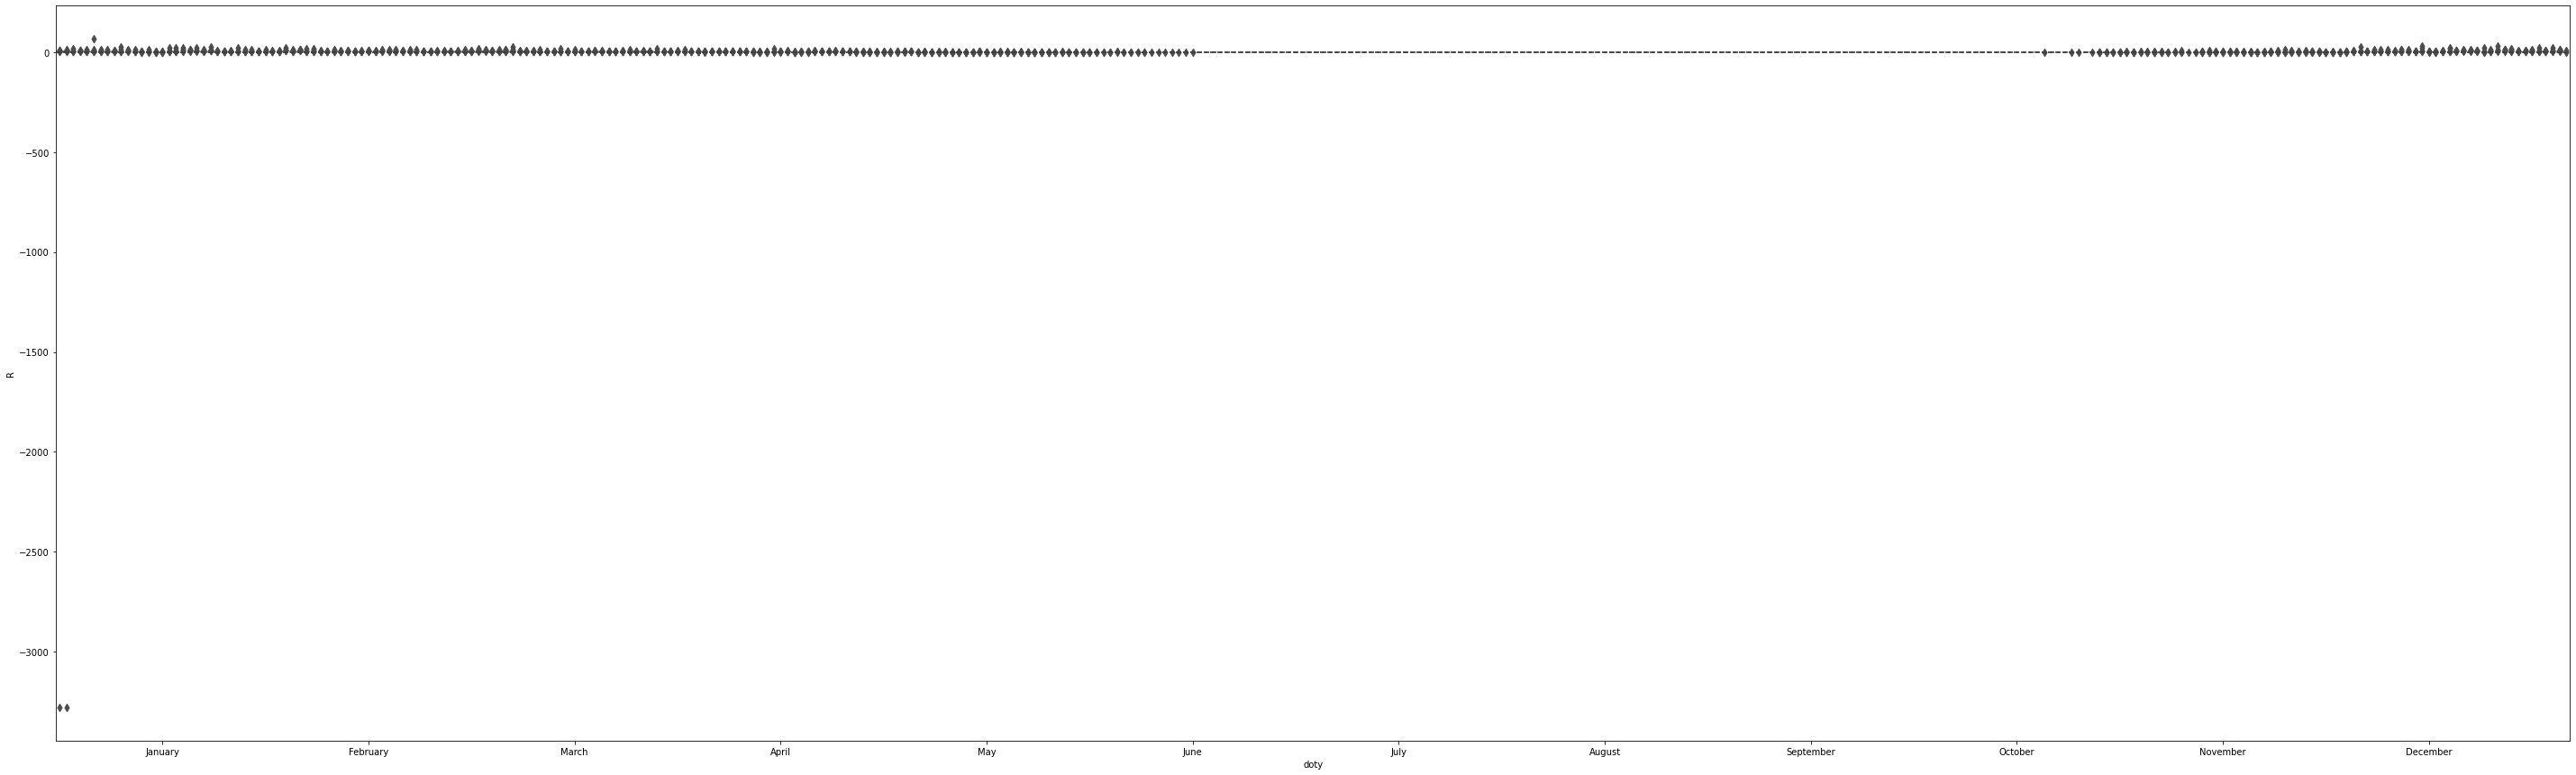

In [3]:
daily_input_stat['doty']=daily_input_stat.index.day_of_year

plt.figure(figsize=(50,15))

g=sns.boxenplot(x="doty", y="R",
              data=daily_input_stat,color="b",scale="linear",)
g.set_xticks((range(15,365,30)))
g.set_xticklabels(daily_input_stat.index.month_name().unique())

In [4]:
daily_input

,Q,Tx5y0,Tx1y1,Tx4y1,Tx5y1,Tx0y2,Tx1y2,Tx2y2,Tx3y2,Tx4y2,...,Rx4y5,Rx5y5,Rx1y6,Rx2y6,Rx3y6,Rx4y6,Rx1y7,Rx2y7,Rx4y7,Rx1y8
time,,,,,,,,,,,,,,,,,,,,,
1979-01-01,9.67,268.184064,268.571353,268.371203,267.861758,269.293647,268.479409,268.182577,268.159013,268.296139,...,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7
1979-01-02,7.74,262.145410,263.509280,262.648583,261.899174,262.980169,263.136230,262.911701,262.870769,262.825648,...,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7,-3276.7
1979-01-03,7.00,266.327720,266.301979,266.346589,266.110603,267.190874,266.310472,266.351181,266.263558,266.070565,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979-01-04,6.30,269.496087,270.050011,269.936710,269.480072,270.885682,270.092108,270.142353,270.069025,270.033251,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1979-01-05,5.97,268.540576,269.585347,269.434125,268.877342,270.525919,269.703273,269.718121,269.612978,269.626448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,31.40,272.689141,272.274086,273.102205,272.925049,272.640268,272.360640,272.640093,273.034188,273.338010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-28,28.00,273.124676,273.092396,273.505112,273.435473,273.654620,273.196223,273.492303,273.681957,273.797810,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-12-29,25.70,273.535074,273.275915,273.647250,273.632786,273.794548,273.168197,273.376722,273.558703,273.753852,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
